### 1. Import the Geologic Data Set from the provided ‘Geologic_DataSet.csv’ file and perform
### the following (10 points):
### a. Apply standard scaling on the data using the sklearn library.
### b. Apply the k-means clustering algorithm using the sklearn library with number of clusters = 3, 7, 12, and 15.
### c. For each number of clusters plot the variation of silhouette coefficients with clusters
### clearly indicating the average silhouette coefficient for all the clusters.

In [1]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Geologic_DataSet.csv')
df.head()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
0,118,2.2096,23,0.13,23,0.077,10670
1,170,2.2185,21,0.17,20,0.073,9932
2,166,2.2260,14,0.20,21,0.070,9747
3,166,2.2260,14,0.20,21,0.070,9747
4,135,2.2303,22,0.16,24,0.068,9222


Text(0.5, 1.0, 'Clustering Data')

<Figure size 360x360 with 0 Axes>

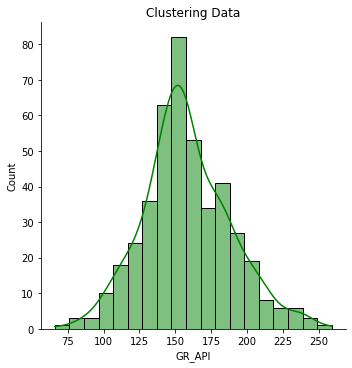

In [3]:
fig=plt.figure(figsize=(5,5))
data=df['GR_API']
sns.displot(data, color='g', kde=True)
plt.title('Clustering Data')

In [4]:
df.drop(labels=['TOC, fraction'], axis=1, inplace=True)
df.head()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
0,118,2.2096,23,0.13,23,10670
1,170,2.2185,21,0.17,20,9932
2,166,2.2260,14,0.20,21,9747
3,166,2.2260,14,0.20,21,9747
4,135,2.2303,22,0.16,24,9222


In [5]:
# a. Apply standard scaling on the data using the sklearn library

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)
df_scaled

array([[-1.31654221, -1.63691997,  0.07053355, -0.79799783,  0.85324677,
         0.88856422],
       [ 0.39613573, -1.19092098, -0.18063471,  0.27088   , -0.08890975,
        -0.00377924],
       [ 0.26439127, -0.81507913, -1.05972362,  1.07253837,  0.22514243,
        -0.22746968],
       ...,
       [-0.03203375,  0.96891686, -0.30621884,  0.27088   , -0.7170141 ,
        -1.12102229],
       [-0.52607547,  0.50287296, -1.05972362,  1.33975783,  0.5391946 ,
         0.55846969],
       [-0.32845878, -0.45928217, -0.43180297,  0.27088   ,  1.16729895,
        -0.65913177]])

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

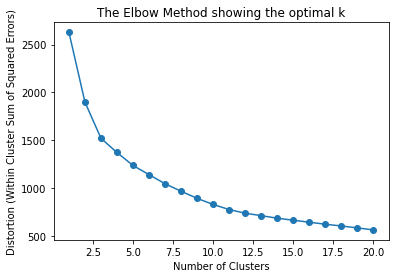

In [6]:
import matplotlib.pyplot as plt
distortions=[]
for i in range (1,21):
    km=KMeans(n_clusters=i,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
    km.fit(df_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1,21),distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Within Cluster Sum of Squared Errors)')
plt.title('The Elbow Method showing the optimal k')

In [7]:
## b. Apply the k-means clustering algorithm using the sklearn library with number of clusters = 3, 7, 12, and 15.

n=3
# Initializing KMeans
kmeans = KMeans(n_clusters=n,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
# Fitting with inputs
kmeans = kmeans.fit(df_scaled)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)


[[-0.44034813 -0.91562349  0.05628287 -0.73545711  0.23627903  0.7052384 ]
 [ 0.87635604  0.09651633  1.14360509 -0.69779054 -0.92451285 -0.31154792]
 [-0.194934    0.63942206 -0.73524138  0.98298374  0.37962214 -0.34889323]]


In [8]:
labels=kmeans.labels_
labels
df_scaled= pd.DataFrame(df_scaled,columns=df.columns[0:6])
df_scaled['Clusters']=labels

Text(0.5, 0, 'silhouette coefficient')

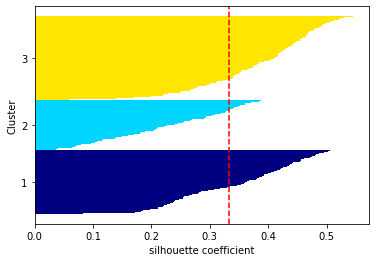

In [9]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(labels)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(df_scaled,labels,metric='euclidean')
y_ax_lower, y_ax_upper=0,0
yticks=[]
for i, c in enumerate (cluster_labels):
    c_silhouette_vals= silhouette_vals[labels==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color= cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
# plt.show()

In [10]:
n=7
# Initializing KMeans
kmeans = KMeans(n_clusters=n,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
# Fitting with inputs
kmeans = kmeans.fit(df_scaled)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)


[[ 1.29301145e+00 -5.47325537e-01  5.32296739e-01 -7.77442491e-01
  -5.47909079e-01  5.15368588e-01  7.69230769e-01]
 [-3.46103129e-01  4.27239266e-01 -6.88353406e-01  7.90049232e-01
   8.60621776e-02 -2.95768676e-01  2.00000000e+00]
 [-4.79759057e-01 -9.51634999e-01  2.66758756e-01 -7.14491753e-01
   3.77261448e-01 -2.02115579e-01  3.12500000e-02]
 [-3.50915224e-01  5.53212994e-01 -7.68596772e-01  1.01180668e+00
   2.43778274e+00 -3.35467643e-01  2.00000000e+00]
 [ 5.49837595e-01  5.49894956e-01  1.67591735e+00 -6.24305186e-01
  -9.73490038e-01 -8.29035735e-01  1.00000000e+00]
 [ 8.74425387e-01  2.01343039e+00 -9.88741285e-01  2.12979797e+00
   1.97833541e-01 -6.85101936e-01  2.00000000e+00]
 [-7.85447366e-01 -8.56343429e-01 -2.53238033e-01 -7.52069490e-01
  -5.48963917e-03  1.46443485e+00 -8.88178420e-16]]


In [11]:
labels=kmeans.labels_
labels
df_scaled= pd.DataFrame(df_scaled,columns=df.columns[0:6])
df_scaled['Clusters']=labels

Text(0.5, 0, 'silhouette coefficient')

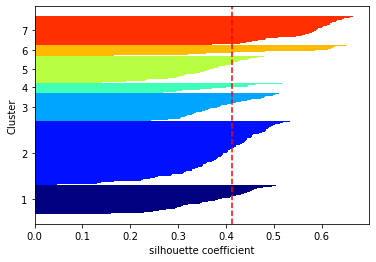

In [12]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(labels)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(df_scaled,labels,metric='euclidean')
y_ax_lower, y_ax_upper=0,0
yticks=[]
for i, c in enumerate (cluster_labels):
    c_silhouette_vals= silhouette_vals[labels==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color= cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
# plt.show()

In [13]:
n=12
# Initializing KMeans
kmeans = KMeans(n_clusters=n,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
# Fitting with inputs
kmeans = kmeans.fit(df_scaled)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)


[[-6.22350263e-01  1.12349387e+00 -5.43862654e-01  9.28650973e-01
  -6.95834602e-02 -2.32008597e-01  1.00000000e+00]
 [-1.09916385e+00 -9.23321579e-01  5.14264146e-01 -8.78163671e-01
   5.28726194e-01 -5.84890724e-01  2.00000000e+00]
 [ 2.61527263e-01  2.84666811e-01  1.38916692e+00 -5.42396613e-01
  -6.41914663e-01 -8.85529618e-01  4.00000000e+00]
 [ 8.74425387e-01  2.01343039e+00 -9.88741285e-01  2.12979797e+00
   1.97833541e-01 -6.85101936e-01  5.00000000e+00]
 [-7.38245319e-01 -1.14174105e+00  1.96117683e-01 -9.59572390e-01
  -5.96955921e-02  1.45888345e+00  6.00000000e+00]
 [ 1.03948783e+00 -7.59287491e-01  5.70079315e-01 -8.27688885e-01
  -8.89097479e-02  4.04130006e-01  4.44089210e-16]
 [ 6.67745876e-02 -9.76617428e-01  4.83716473e-02 -5.70075355e-01
   2.43616083e-01  1.35627195e-01  2.00000000e+00]
 [ 1.49714297e+00  1.42135886e+00  2.61809734e+00 -8.93433355e-01
  -2.06295198e+00 -6.43412978e-01  4.00000000e+00]
 [-8.82099178e-01 -2.71957823e-01 -1.17334736e+00 -3.27182598e-0

Text(0.5, 0, 'silhouette coefficient')

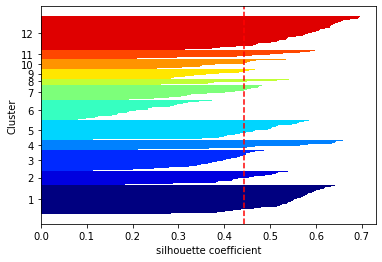

In [14]:
labels=kmeans.labels_
labels
df_scaled= pd.DataFrame(df_scaled,columns=df.columns[0:6])
df_scaled['Clusters']=labels

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(labels)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(df_scaled,labels,metric='euclidean')
y_ax_lower, y_ax_upper=0,0
yticks=[]
for i, c in enumerate (cluster_labels):
    c_silhouette_vals= silhouette_vals[labels==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color= cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
# plt.show()

In [15]:
n=15
# Initializing KMeans
kmeans = KMeans(n_clusters=n,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
# Fitting with inputs
kmeans = kmeans.fit(df_scaled)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)


[[ 5.47641854e-01  2.98743816e+00 -7.33204881e-01  2.83618680e+00
  -1.21949757e+00 -1.45006504e-01  3.00000000e+00]
 [-1.22830610e-01 -1.81159204e-01 -8.06858276e-01  6.75320260e-01
   2.37874271e-01 -3.74232829e-01  1.10000000e+01]
 [ 8.07837156e-01 -6.63907182e-01  5.57172057e-01 -8.64802699e-01
  -4.94560472e-01 -1.28270026e-01  5.00000000e+00]
 [-6.22350263e-01  1.12349387e+00 -5.43862654e-01  9.28650973e-01
  -6.95834602e-02 -2.32008597e-01  2.66453526e-15]
 [ 1.82650412e+00 -5.79069404e-02  3.63563190e-01 -6.19851529e-01
  -1.55448656e+00  7.94251500e-01  1.00000000e+01]
 [ 5.21546318e-01  2.78331551e-01  1.23460184e+00 -3.45780289e-01
  -2.94251554e-01 -1.30104426e+00  2.00000000e+00]
 [-1.09916385e+00 -9.23321579e-01  5.14264146e-01 -8.78163671e-01
   5.28726194e-01 -5.84890724e-01  1.00000000e+00]
 [-3.50915224e-01  5.53212994e-01 -7.68596772e-01  1.01180668e+00
   2.43778274e+00 -3.35467643e-01  9.00000000e+00]
 [ 1.49714297e+00  1.42135886e+00  2.61809734e+00 -8.93433355e-0

Text(0.5, 0, 'silhouette coefficient')

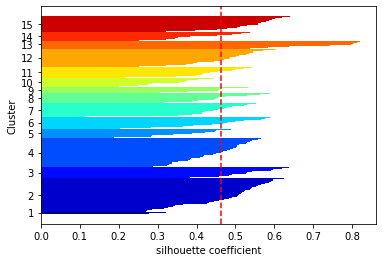

In [16]:
labels=kmeans.labels_
labels
df_scaled= pd.DataFrame(df_scaled,columns=df.columns[0:6])
df_scaled['Clusters']=labels

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(labels)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(df_scaled,labels,metric='euclidean')
y_ax_lower, y_ax_upper=0,0
yticks=[]
for i, c in enumerate (cluster_labels):
    c_silhouette_vals= silhouette_vals[labels==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color= cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
# plt.show()